In [73]:
import pandas as pd
import locale
from dateutil import parser
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from googletrans import Translator
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller


In [37]:
# # Set the locale to French
# locale.setlocale(locale.LC_TIME, 'fr_FR.UTF-8')

file_path = 'Data/forecast_data_3years.csv'
data = pd.read_csv(file_path, encoding='ISO-8859-1', delimiter=';')

data = data[['mois', 'Spend', 'Conversions']]

data['Spend'] = data['Spend'].str.replace(',', '.').astype(float)


In [38]:
data

,mois,Spend,Conversions
0,juin-15,39456.23,1578
1,juil-15,57338.93,1864
2,août-15,31802.36,1138
3,sept-15,52195.88,2176
4,oct-15,27642.56,1185
5,nov-15,31215.60,1471
6,déc-15,64036.93,2942
7,janv-16,58342.15,2768
8,févr-16,18326.47,863
9,mars-16,90135.24,3127


In [39]:
month_map = {
    'janv': 'Jan',
    'févr': 'Feb',
    'mars': 'Mar',
    'avr': 'Apr',
    'mai': 'May',
    'juin': 'Jun',
    'juil': 'Jul',
    'août': 'Aug',
    'sept': 'Sep',
    'oct': 'Oct',
    'nov': 'Nov',
    'déc': 'Dec'
}

for fr, en in month_map.items():
    data['mois'] = data['mois'].str.replace(fr, en)



In [40]:
# locale.setlocale(locale.LC_TIME, 'en_US.UTF-8')

In [41]:
data

,mois,Spend,Conversions
0,Jun-15,39456.23,1578
1,Jul-15,57338.93,1864
2,Aug-15,31802.36,1138
3,Sep-15,52195.88,2176
4,Oct-15,27642.56,1185
5,Nov-15,31215.60,1471
6,Dec-15,64036.93,2942
7,Jan-16,58342.15,2768
8,Feb-16,18326.47,863
9,Mar-16,90135.24,3127


In [42]:
data['mois'] = pd.to_datetime(data['mois'], format='%b-%y')

In [43]:
data

,mois,Spend,Conversions
0,2015-06-01,39456.23,1578
1,2015-07-01,57338.93,1864
2,2015-08-01,31802.36,1138
3,2015-09-01,52195.88,2176
4,2015-10-01,27642.56,1185
5,2015-11-01,31215.60,1471
6,2015-12-01,64036.93,2942
7,2016-01-01,58342.15,2768
8,2016-02-01,18326.47,863
9,2016-03-01,90135.24,3127


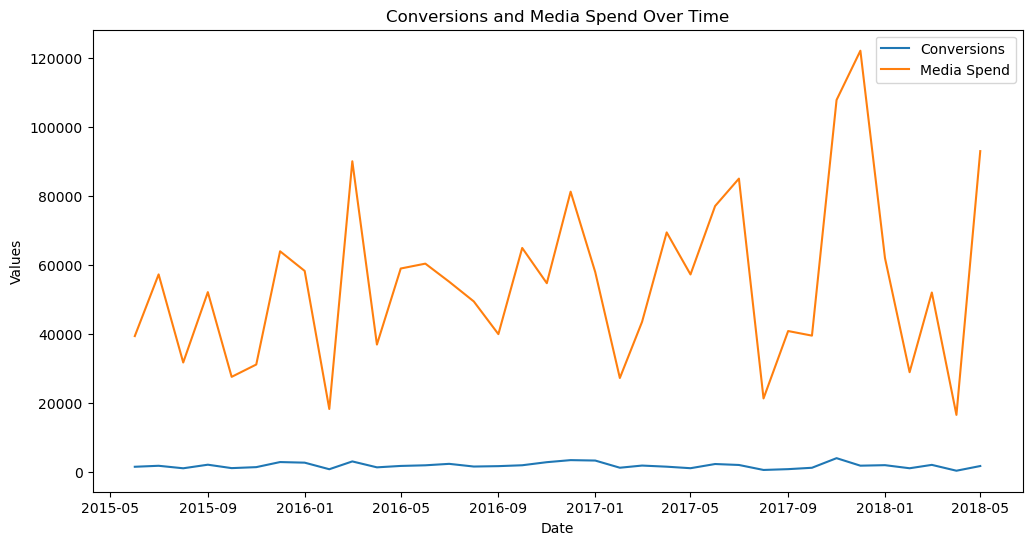

In [44]:
import matplotlib.pyplot as plt

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(data['mois'], data['Conversions'], label='Conversions')
plt.plot(data['mois'], data['Spend'], label='Media Spend')
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Conversions and Media Spend Over Time')
plt.legend()
plt.show()


In [81]:
# import matplotlib.pyplot as plt

# # Plot the data
# plt.figure(figsize=(12, 6))
# plt.plot(data['mois'], data['Conversions'], label='Conversions')
# plt.plot(data['mois'], data['Spend'], label='Media Spend')
# plt.xlabel('Date')
# plt.ylabel('Values')
# plt.title('Conversions and Media Spend Over Time')
# plt.legend()
# plt.show()


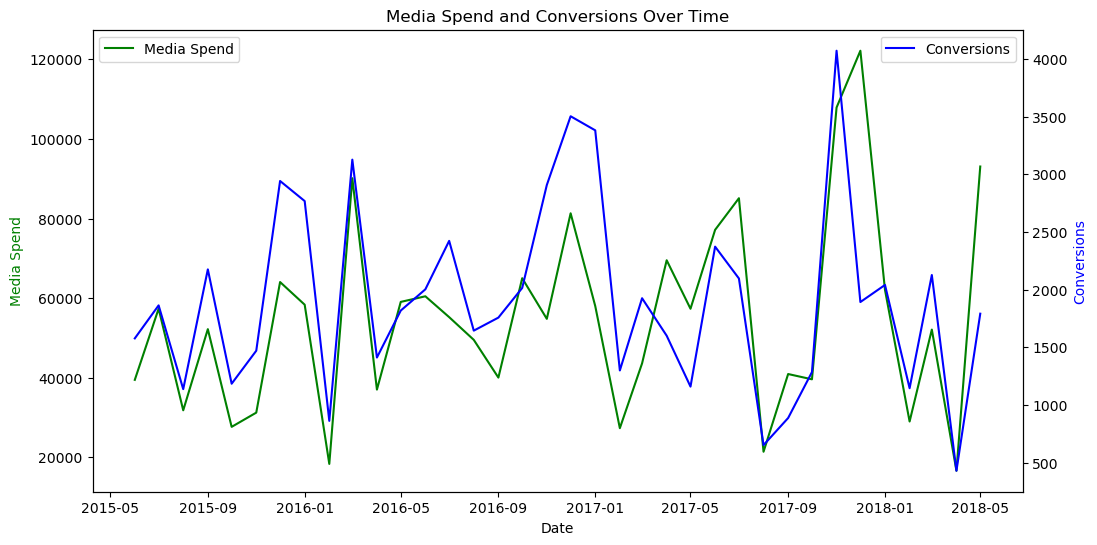

In [51]:
# Set up the figure and first axis
plt.figure(figsize=(12, 6))
ax1 = plt.gca()  # Get the current axis
sns.lineplot(data=data, x='mois', y='Spend', color="g", ax=ax1, label='Media Spend')

# Create a second y-axis for the Conversions
ax2 = ax1.twinx()
sns.lineplot(data=data, x='mois', y='Conversions', color="b", ax=ax2, label='Conversions')

# Adding labels and title
ax1.set_xlabel('Date')
ax1.set_ylabel('Media Spend', color='g')
ax2.set_ylabel('Conversions', color='b')
plt.title('Media Spend and Conversions Over Time')

# Add legends for both axes
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.show()


In [77]:
#seasonality in data

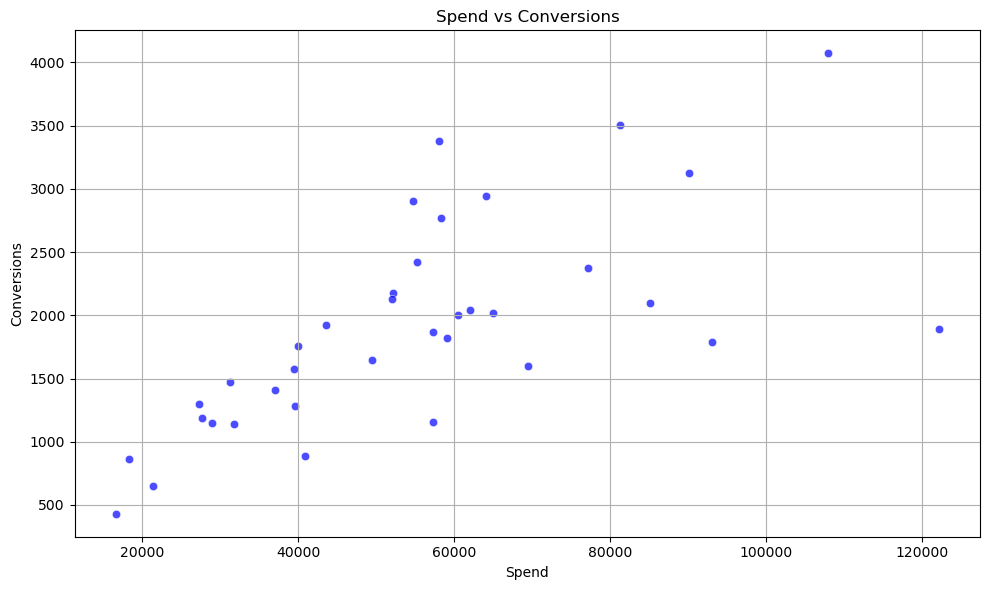

In [76]:
spend = data['Spend']
conversions = data['Conversions']

# Plotting using matplotlib and seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x=spend, y=conversions, color='blue', alpha=0.7)
plt.title('Spend vs Conversions')
plt.xlabel('Spend')
plt.ylabel('Conversions')
plt.grid(True)
plt.tight_layout()
plt.show()

In [78]:
#linearity in data

In [80]:
X = data.Conversions
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))

ADF Statistic: -5.619162
p-value: 0.000001
Critical Values:
	1%: -3.633
	5%: -2.949
	10%: -2.613


In [ ]:
#stationary data

### SARIMAX

In [54]:
from sklearn.model_selection import train_test_split

# Convert the index to a regular column if necessary
data.reset_index(drop=True, inplace=True)

# Split the data while keeping the time order
train, test = train_test_split(data, test_size=2, shuffle=False)

# train and test before ARIMAX 
from statsmodels.tsa.statespace.sarimax import SARIMAX

arimax_model = SARIMAX(train['Conversions'], exog=train[['Spend']], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
arimax_result = arimax_model.fit(disp=False)
arimax_forecast = arimax_result.forecast(steps=2, exog=test[['Spend']])


/Users/mohammedjawhar/anaconda3/envs/madc/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/mohammedjawhar/anaconda3/envs/madc/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/mohammedjawhar/anaconda3/envs/madc/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [55]:
arimax_forecast

34     195.628359
35    1248.805674
Name: predicted_mean, dtype: float64

In [62]:
# Assuming 'test' contains the actual conversions and 'arimax_forecast' contains the predicted conversions
actual = test['Conversions'].values
predicted = arimax_forecast.values

# Calculate MAE, MSE, and RMSE
r2 = r2_score(actual, predicted)
mae = mean_absolute_error(actual, predicted)
mse = mean_squared_error(actual, predicted)
rmse = np.sqrt(mse)

print("r2_score(r2):", r2)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

r2_score(r2): 0.6215991879856424
Mean Absolute Error (MAE): 389.2829834610633
Mean Squared Error (MSE): 175229.94262781172
Root Mean Squared Error (RMSE): 418.6047570534904


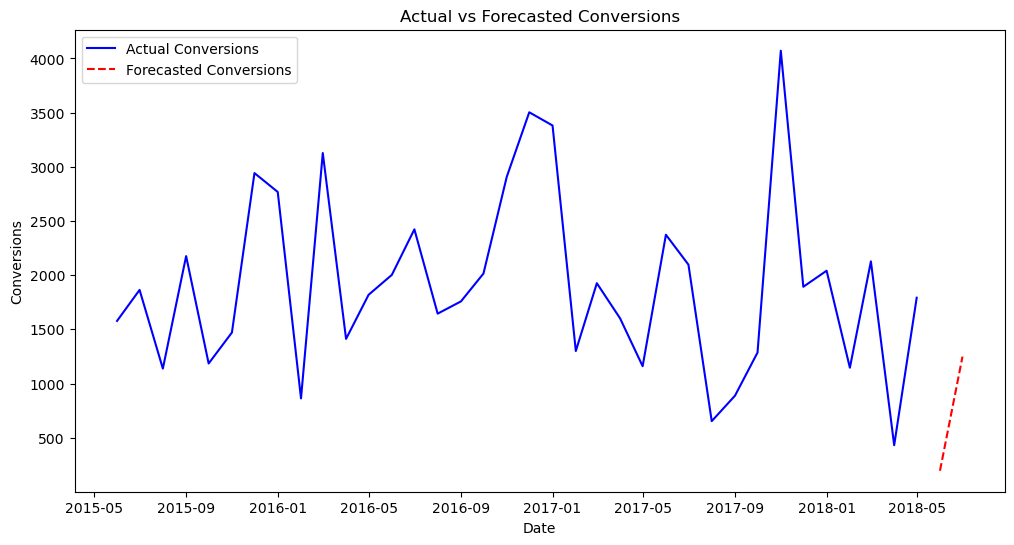

In [56]:
# Plot actual conversions
plt.figure(figsize=(12, 6))
plt.plot(data['mois'], data['Conversions'], label='Actual Conversions', color='blue')

# Prepare to add ARIMAX forecasted values
# Create a new timestamp for the forecasted months and append to the existing timestamps
forecast_dates = pd.date_range(start=data['mois'].iloc[-1] + pd.DateOffset(months=1), periods=2, freq='MS')

# Plot ARIMAX forecasted conversions
plt.plot(forecast_dates, arimax_forecast, label='Forecasted Conversions', color='red', linestyle='--')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Conversions')
plt.title('Actual vs Forecasted Conversions')
plt.legend()

# Show the plot
plt.show()

### Prophet

In [64]:
# !pip install prophet

In [66]:
data

,mois,Spend,Conversions
0,2015-06-01,39456.23,1578
1,2015-07-01,57338.93,1864
2,2015-08-01,31802.36,1138
3,2015-09-01,52195.88,2176
4,2015-10-01,27642.56,1185
5,2015-11-01,31215.60,1471
6,2015-12-01,64036.93,2942
7,2016-01-01,58342.15,2768
8,2016-02-01,18326.47,863
9,2016-03-01,90135.24,3127


In [67]:
from prophet import Prophet
import pandas as pd

# Convert 'mois' to datetime if not already
data['mois'] = pd.to_datetime(data['mois'])

# Prepare the data for Prophet
prophet_df = data.rename(columns={'mois': 'ds', 'Conversions': 'y'})
prophet_df['Spend'] = data['Spend']  

prophet_model = Prophet()
prophet_model.add_regressor('Spend')
prophet_model.fit(prophet_df)

# Create a dataframe for future predictions
future_dates = prophet_model.make_future_dataframe(periods=2, freq='MS')

# Add future values of Spend assuming a continuation of the last observed Spend
# This is just a placeholder; adjust according to your knowledge of future spend
future_spend = [data['Spend'].iloc[-1], data['Spend'].iloc[-1]]
future_dates['Spend'] = [data['Spend'].iloc[-1]] * len(data['Spend']) + future_spend

# Forecast
prophet_forecast = prophet_model.predict(future_dates)
prophet_forecast[['ds', 'yhat']].tail()


21:00:27 - cmdstanpy - INFO - Chain [1] start processing
21:00:27 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat
33,2018-03-01,2997.043243
34,2018-04-01,1961.154118
35,2018-05-01,1776.652279
36,2018-06-01,2144.273308
37,2018-07-01,2077.143710


In [82]:
future_spend

[93073.46, 93073.46]

In [70]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Extract the actual and predicted values where predictions exist
actual = prophet_df['y']
predicted = prophet_forecast['yhat'].iloc[:len(prophet_df)]

# Calculate MAE, MSE, and RMSE
mae = mean_absolute_error(actual, predicted)
mse = mean_squared_error(actual, predicted)
rmse = np.sqrt(mse)
r2 = r2_score(actual, predicted)


print("r2_score (r2):", r2)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)


r2_score (r2): -0.47079220648883524
Mean Absolute Error (MAE): 872.7503083643517
Mean Squared Error (MSE): 981221.565115409
Root Mean Squared Error (RMSE): 990.5662850690048


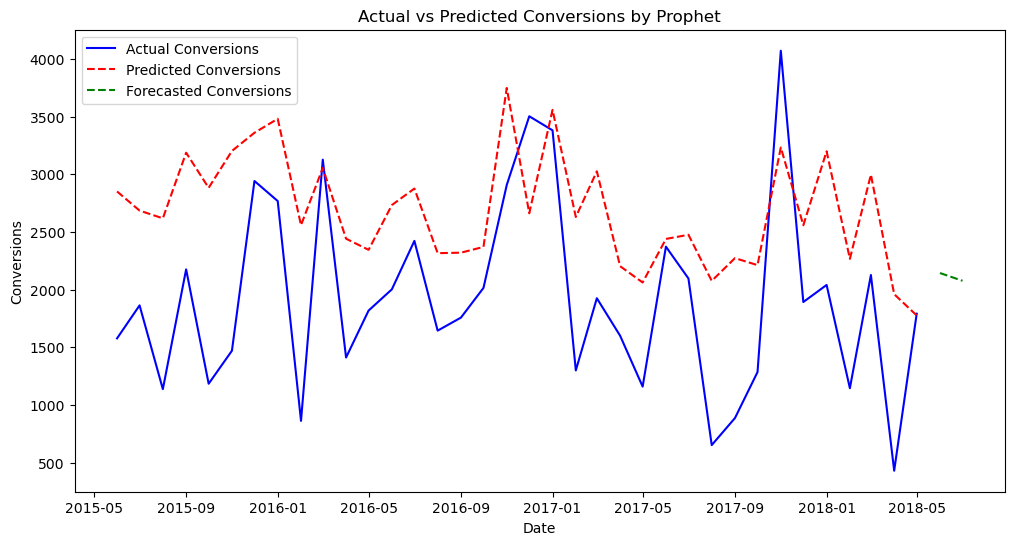

In [69]:
import matplotlib.pyplot as plt

# Plot actual conversions
plt.figure(figsize=(12, 6))
plt.plot(prophet_df['ds'], prophet_df['y'], label='Actual Conversions', color='blue')

# Plot predicted conversions from Prophet
# Ensure to only plot the predictions for the existing data points
predicted = prophet_forecast.set_index('ds')['yhat'].iloc[:len(prophet_df)]
plt.plot(predicted.index, predicted, label='Predicted Conversions', color='red', linestyle='--')

# Highlight the forecast period
future_predicted = prophet_forecast.set_index('ds')['yhat'].iloc[len(prophet_df):]
plt.plot(future_predicted.index, future_predicted, label='Forecasted Conversions', color='green', linestyle='--')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Conversions')
plt.title('Actual vs Predicted Conversions by Prophet')
plt.legend()

# Show the plot
plt.show()


# Answers

#### i. Some of ideas are to use a regressor (Linear/Xgboost), but since our dataset is horizontally small, we do further research into the data. Upon further research, we figure that the data is stationary, has somewhat of a linear relationship and had has seasonality, therefore we use SARIMAX. Upon doing a feasibility study based on Prophet, we understand that prophet is highly sensitive to outlier and has mediocre performance.

#### ii.  A few disadvantage of using SARIMAX here is the complexity of deciding the parmeters (p,d,q) - model can be further improved by ploting ACF and PACF to get moving average(q) and p respectively. This method requires the data to be Stationary and assumes Linearity.

#### iii. Implementation above

In [ ]:


### Future spend = [77155.31, 85107.24]

In [83]:
future_spend = [77155.31, 85107.24]
future_dates['Spend'] = [data['Spend'].iloc[-1]] * len(data['Spend']) + future_spend

# Forecast
prophet_forecast = prophet_model.predict(future_dates)
prophet_forecast[['ds', 'yhat']].tail()

,ds,yhat
33,2018-03-01,2997.043243
34,2018-04-01,1961.154118
35,2018-05-01,1776.652279
36,2018-06-01,1821.502421
37,2018-07-01,1915.613388


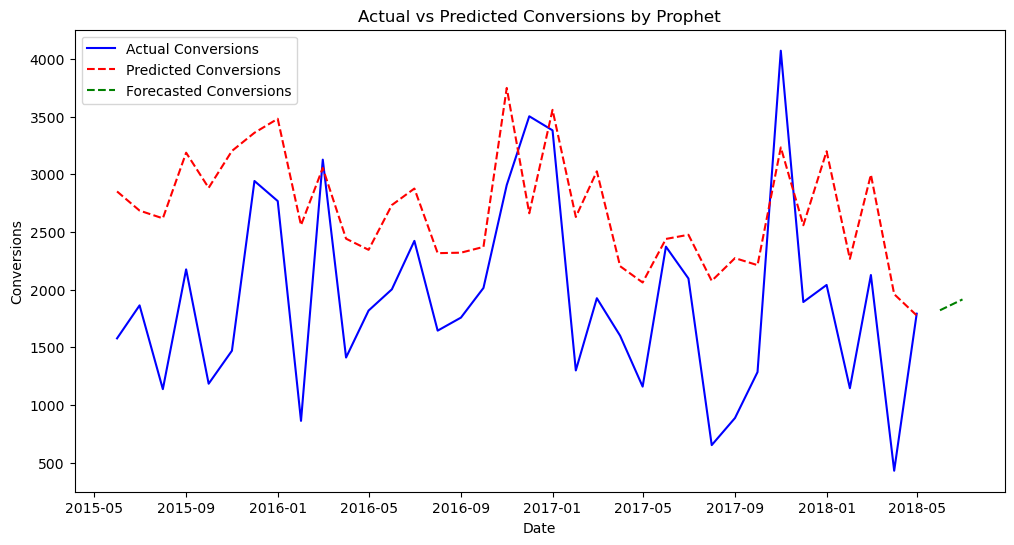

In [84]:
import matplotlib.pyplot as plt

# Plot actual conversions
plt.figure(figsize=(12, 6))
plt.plot(prophet_df['ds'], prophet_df['y'], label='Actual Conversions', color='blue')

# Plot predicted conversions from Prophet
# Ensure to only plot the predictions for the existing data points
predicted = prophet_forecast.set_index('ds')['yhat'].iloc[:len(prophet_df)]
plt.plot(predicted.index, predicted, label='Predicted Conversions', color='red', linestyle='--')

# Highlight the forecast period
future_predicted = prophet_forecast.set_index('ds')['yhat'].iloc[len(prophet_df):]
plt.plot(future_predicted.index, future_predicted, label='Forecasted Conversions', color='green', linestyle='--')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Conversions')
plt.title('Actual vs Predicted Conversions by Prophet')
plt.legend()

# Show the plot
plt.show()

In [85]:
# Extract the actual and predicted values where predictions exist
actual = prophet_df['y']
predicted = prophet_forecast['yhat'].iloc[:len(prophet_df)]

# Calculate MAE, MSE, and RMSE
mae = mean_absolute_error(actual, predicted)
mse = mean_squared_error(actual, predicted)
rmse = np.sqrt(mse)
r2 = r2_score(actual, predicted)


print("r2_score (r2):", r2)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

r2_score (r2): -0.47079220648883524
Mean Absolute Error (MAE): 872.7503083643517
Mean Squared Error (MSE): 981221.565115409
Root Mean Squared Error (RMSE): 990.5662850690048


In [86]:
actual

0     1578
1     1864
2     1138
3     2176
4     1185
5     1471
6     2942
7     2768
8      863
9     3127
10    1412
11    1819
12    2003
13    2423
14    1645
15    1758
16    2015
17    2907
18    3503
19    3381
20    1300
21    1926
22    1601
23    1160
24    2373
25    2097
26     653
27     888
28    1286
29    4071
30    1893
31    2041
32    1146
33    2127
34     431
35    1792
Name: y, dtype: int64

In [87]:
predicted


0     2851.390930
1     2685.292274
2     2618.276037
3     3187.237601
4     2882.679233
5     3202.361777
6     3359.918757
7     3481.145091
8     2558.931659
9     3055.107790
10    2441.947611
11    2345.422010
12    2733.371907
13    2876.521814
14    2316.565623
15    2320.671787
16    2370.585109
17    3748.356721
18    2662.086857
19    3558.557668
20    2630.212612
21    3025.822832
22    2203.469414
23    2062.288029
24    2439.802479
25    2475.780769
26    2076.512259
27    2273.603842
28    2212.613879
29    3232.977181
30    2558.525078
31    3199.630297
32    2267.142747
33    2997.043243
34    1961.154118
35    1776.652279
Name: yhat, dtype: float64